In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
width = 17
height = 24

half_width = width / 2
half_height = height / 2

print('half width:', half_width)
print('half height:', half_height)

half width: 8.5
half height: 12.0


In [3]:
from collections import defaultdict


def is_strike(x, y) -> bool:
    return abs(x) <= 8.5 and abs(y) <= 12

def get_strike_zone_percentage_by_pitch_type(pitches: list, pitch_type: str) -> float:
    pitch_mappings = defaultdict(lambda: { 'strikes': 0, 'total': 0 })
    for pt, x, y in pitches:
        pitch_mappings[pt]['strikes'] += int(is_strike(x, y))
        pitch_mappings[pt]['total'] += 1

    observation = pitch_mappings[pitch_type]
    return round(0.0 if observation['strikes'] == 0 else (observation['strikes'] / observation['total']), 3)

get_strike_zone_percentage_by_pitch_type([
    ['FB', 2.2, -5.8],
    ['SL', 3, 5],
    ['FB', 8.5, -5.8],
    ['FB', -8.5, -5.8],
    ['FB', -8.55, -5.8],
], 'FB')



0.75

In [4]:


possible_x = np.linspace(-15, 15, 1000).tolist()
possible_y = np.linspace(-15, 15, 1000).tolist()

def generate_pitch():
    return (
        random.choice(possible_x),
        random.choice(possible_y),
    )

pitch_sequence = [
    ['FB', *generate_pitch()]
    for _ in range(100)
]



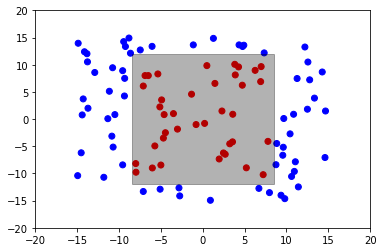

In [5]:
from matplotlib.patches import Rectangle

x = [ row[1] for row in pitch_sequence ]
y = [ row[2] for row in pitch_sequence ]

colors = [ 'r' if is_strike(row[1], row[2]) else 'blue' for row in pitch_sequence ]
labels = [ 'strike' if is_strike(row[1], row[2]) else 'ball' for row in pitch_sequence ]

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=colors)
ax.add_patch(Rectangle((-8.5, -12), 17, 24, alpha=0.3, color='black'))

plt.xlim(-20, 20)
plt.ylim(-20, 20)


plt.show()